# Regularized Method for Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/home/rajat/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
print(sklearn.__version__)

1.18.1
1.0.3
3.6.8 |Anaconda custom (64-bit)| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]
0.22


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

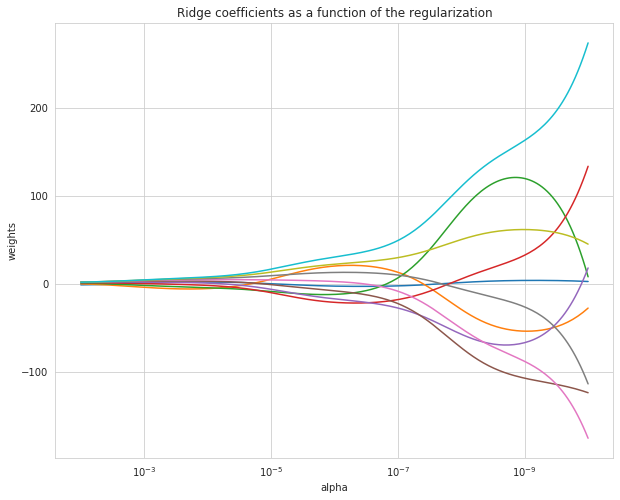

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# ###########################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# ###########################################################################
# Display results

plt.figure(figsize=(10,8))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# Imact of outliers on linear regression

In [6]:
from sklearn.linear_model import LinearRegression

Coefficient Estimate:  [0.47134857]


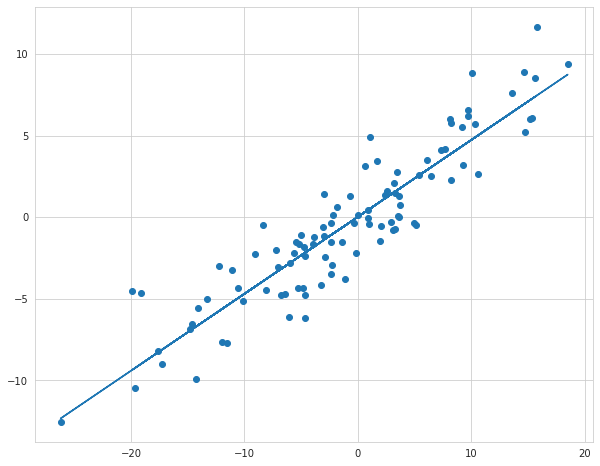

In [7]:
np.random.seed(42)
n_samples = 100
rng = np.random.randn(n_samples) * 10
y_gen = 0.5 * rng + 2 * np.random.randn(n_samples)

lr = LinearRegression()
lr.fit(rng.reshape(-1, 1), y_gen)
model_pred = lr.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, model_pred);
print("Coefficient Estimate: ", lr.coef_)

In [8]:
idx = rng.argmax()
y_gen[idx] = 200
idx = rng.argmin()
y_gen[idx] = -200

Coefficient Estimate:  [1.50556072]


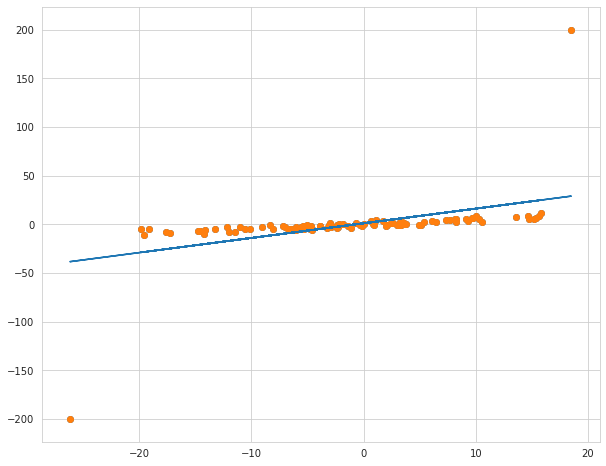

In [9]:
plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);

o_lr = LinearRegression(normalize=True)
o_lr.fit(rng.reshape(-1, 1), y_gen)
o_model_pred = o_lr.predict(rng.reshape(-1,1))

plt.scatter(rng, y_gen);
plt.plot(rng, o_model_pred);
print("Coefficient Estimate: ", o_lr.coef_)

# Imact of outliers on ridge regression

In [10]:
from sklearn.linear_model import Ridge

Coefficient Estimate:  [1.00370714]


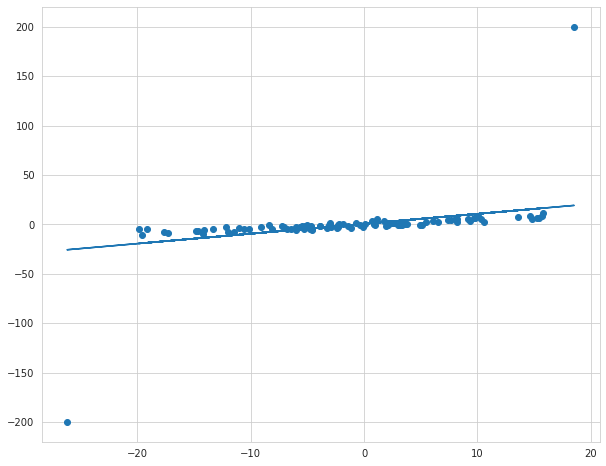

In [11]:
ridge_mod = Ridge(alpha=0.5, normalize=True)
ridge_mod.fit(rng.reshape(-1, 1), y_gen)
ridge_model_pred = ridge_mod.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, ridge_model_pred);
print("Coefficient Estimate: ", ridge_mod.coef_)

# Imact of outliers on LASSO regression

In [12]:
from sklearn.linear_model import Lasso

Coefficient Estimate:  [1.06289489]


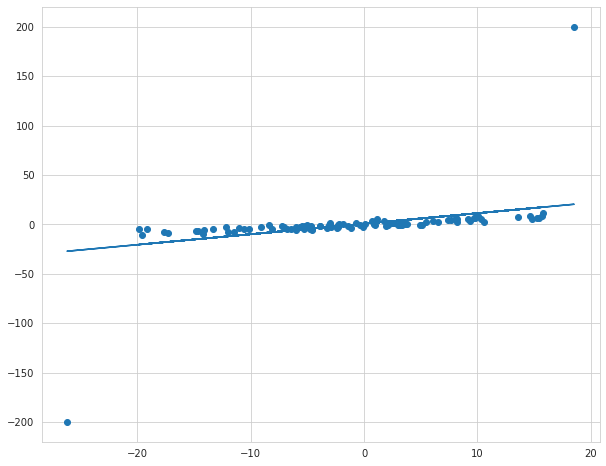

In [13]:
lasso_mod = Lasso(alpha=0.4, normalize=True)
lasso_mod.fit(rng.reshape(-1, 1), y_gen)
lasso_model_pred = lasso_mod.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, lasso_model_pred);
print("Coefficient Estimate: ", lasso_mod.coef_)

# Imact of outliers on Elastic Net

In [14]:
from sklearn.linear_model import ElasticNet

Coefficient Estimate:  [0.74724704]


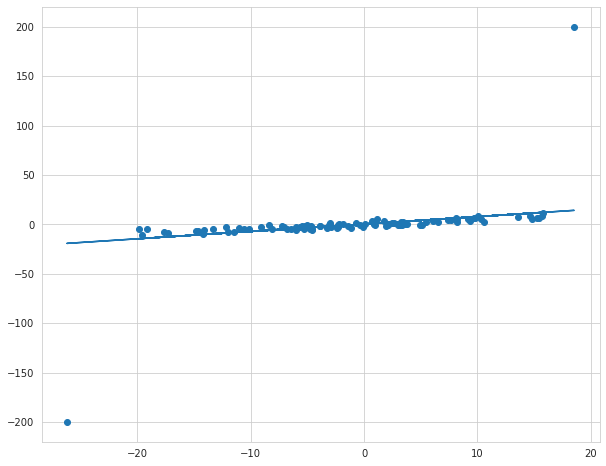

In [16]:
en_mod = ElasticNet(alpha=0.02, normalize=True)
en_mod.fit(rng.reshape(-1, 1), y_gen)
en_model_pred = en_mod.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, en_model_pred);
print("Coefficient Estimate: ", en_mod.coef_)